In [1]:
# Lab 1 (Exploring Digital Sampling, Fourier Transforms, and both DSB and SSB Mixers), Due Feb 6, 11:59 pm
# Report by Olivia Wagner

In [108]:
# import packages for plotting and analyzing data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal
from scipy.signal import correlate, correlation_lags

In [110]:
# 5.3.1 Sampling with an SDR and a Raspberry Pi
    # Capturing data at various sample rates

# Loading data at sample rate 1.0e6 Hz
    # WELL BELOW THE NYQUIST RATE
with np.load("data_1.0e6.npz") as data:
    print(data.files)
    arr_A = data['arr_0']
    print(arr_A)

# Loading data at sample rate 1.5e6 Hz
    # ~BELOW THE NYQUIST RATE
with np.load("data_1.5e6.npz") as data:
    print(data.files)
    arr_B = data['arr_0']
    print(arr_B)

# Loading data at sample rate 2.0e6 Hz
    # AT THE NYQUIST RATE
with np.load("data_2.0e6.npz") as data:
    print(data.files)
    arr_C = data['arr_0']
    print(arr_C)

# Loading data at sample rate 2.5e6 Hz
    # ~ABOVE THE NYQUIST RATE
with np.load("data_2.5e6.npz") as data:
    print(data.files)
    arr_D = data['arr_0']
    print(arr_D)

# Loading data at sample rate 3.0e6 Hz
    # WELL ABOVE THE NYQUIST RATE
with np.load("data_3.0e6.npz") as data:
    print(data.files)
    arr_E = data['arr_0']
    print(arr_E)

# Data BELOW the Nyquist Rate will appear indistinguishable (very "noisy" — don't use in paper prof doesn't like using the work noisy)
# Data AT the Nyquist Rate will appear slightly more reconstructed, but it is not t
# Data ABOVE the Nyquist Rate will appear cleaner, since the infomration from the signal is preserved

['arr_0']
[[   0   -1   -1 ... -128  127 -128]
 [  60   41 -128 ...   56   44 -128]]
['arr_0']
[[  -1    0   -1 ...   72  127 -116]
 [-128  127  112 ...  127   38 -128]]
['arr_0']
[[  -1    0   -1 ...  -89 -128  -29]
 [ 127  120  -89 ...  127  121  -88]]
['arr_0']
[[  -1   -1   -1 ...  -98 -128  -61]
 [ 127  127   39 ...  127    4 -101]]
['arr_0']
[[ -1  -1  -1 ...  68  59  13]
 [-44 -78 -59 ...  13 -43 -78]]


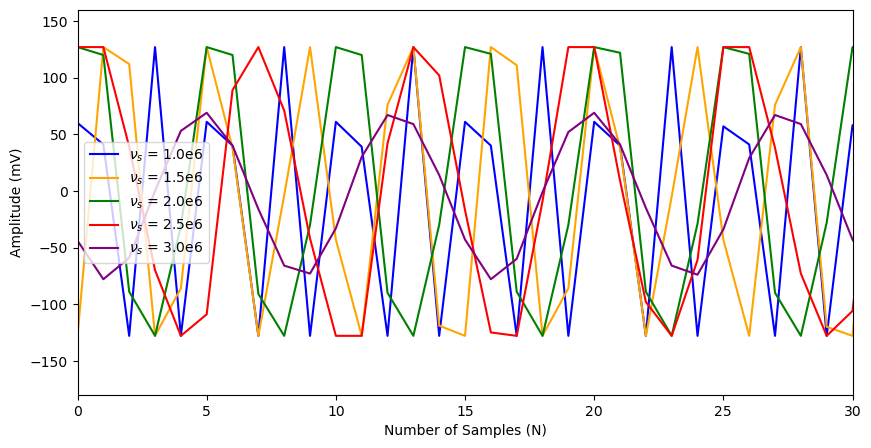

In [111]:
# This is the first plot that we got, using the various sample rates, with an amplitude of 2.5 mV, and a frequency of 400 kHz:
    # There is no variation of amplitude or frequency in this data

plt.figure(figsize=[10,5]) # Size of the plot

plt.plot(arr_A[1], color='blue', label = r"$\nu_{s}$ = 1.0e6")
plt.plot(arr_B[1], color='orange', label = r"$\nu_{s}$ = 1.5e6")
plt.plot(arr_C[1], color='green', label = r"$\nu_{s}$ = 2.0e6")
plt.plot(arr_D[1], color='red', label = r"$\nu_{s}$ = 2.5e6")
plt.plot(arr_E[1], color='purple', label = r"$\nu_{s}$ = 3.0e6")

plt.ylim([-180,160])
plt.xlim([0,30])

# Axes
plt.ylabel('Amplitude (mV)')
    # The y-axis is the amplitude in mV
    # We put in an amplitude of 2.5 mV, which means the recorded y-values represent the digitized voltage samples produced by the SDR
plt.xlabel('Number of Samples (N)')
    # The x-axis is the sample index, but it is not time-accurate, meaning we must convert our plot into one of Amplitude vs. Time

plt.legend()
plt.show()

127
127
127
127
70


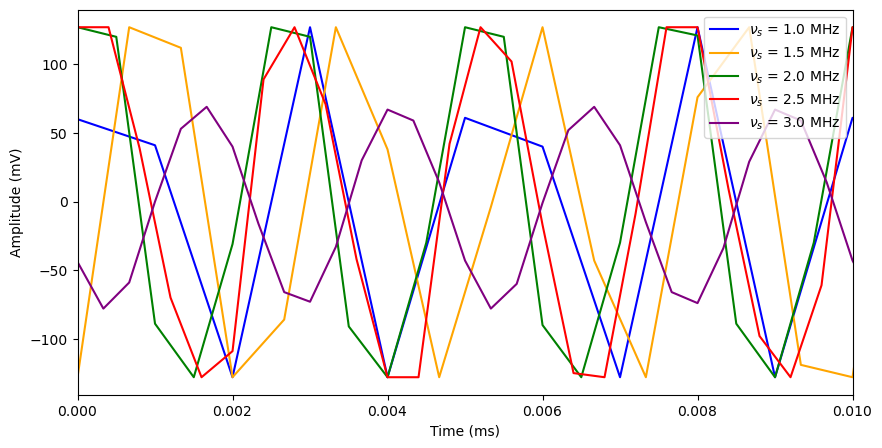

In [112]:
# This is the next plot that we got, using the various sample rates, with an amplitude of 2.5 mV, and a frequency of 400 kHz:
    # There is no variation of amplitude or frequency in this data
    # This plot has CORRECT UNITS of Amplitude (mV) vs. Time (ms)
    # Time is in milliseconds, since the frequency is very high

def N2time(v, N): # Takes the length of the array for each sample rate and divides it by the sampling rate, giving time
    return np.arange(N) / v

# FIRST Sample Rate Conversion
v_1 = 1.0e6
t_A = N2time(v_1, len(arr_A[1]))

# SECOND Sample Rate Conversion
v_2 = 1.5e6
t_B = N2time(v_2, len(arr_B[1]))

# THIRD Sample Rate Conversion
v_3 = 2.0e6
t_C = N2time(v_3, len(arr_C[1]))

# FOURTH Sample Rate Conversion
v_4 = 2.5e6
t_D = N2time(v_4, len(arr_D[1]))

# FIFTH Sample Rate Conversion
v_5 = 3.0e6
t_E = N2time(v_5, len(arr_E[1]))

# Maximum values in each array
print(np.max(arr_A[1]))
print(np.max(arr_B[1]))
print(np.max(arr_C[1]))
print(np.max(arr_D[1]))
print(np.max(arr_E[1]))

# Plot
plt.figure(figsize=[10,5])

plt.plot(t_A*1000, # Converting to the correct units of time, milliseconds
         arr_A[1], color='blue', label=r'$\nu_{s}$ = 1.0 MHz')
plt.plot(t_B*1000, arr_B[1], color='orange', label=r'$\nu_{s}$ = 1.5 MHz')
plt.plot(t_C*1000, arr_C[1], color='green', label=r'$\nu_{s}$ = 2.0 MHz')
plt.plot(t_D*1000, arr_D[1], color='red', label=r'$\nu_{s}$ = 2.5 MHz')
plt.plot(t_E*1000, arr_E[1], color='purple', label=r'$\nu_{s}$ = 3.0 MHz')

plt.xlim([0,0.01]) # Moving at such a quick rate that we have to zoom WAYYY in
# plt.ylim([-125,125])

# Correct units for the plot
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (mV)')

plt.legend()
plt.show()

In [ ]:
plt.scatter(freq_A

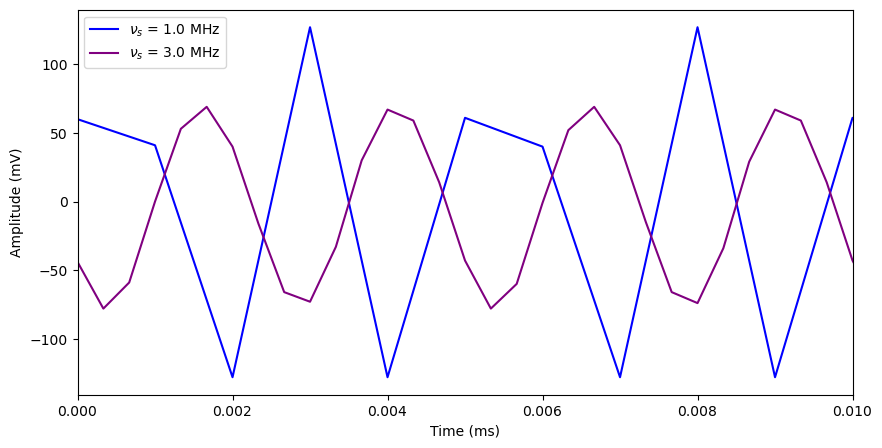

In [114]:
# Plot of ONLY the fifth sample rate, where v_s = 3.0e6
    # This sample rate is above the Nyquist Rate, meaning that the information from the signal is preserved and can be easily reconstructed

plt.figure(figsize=[10,5])
plt.plot(t_A*1000, # Converting to the correct units of time, milliseconds
         arr_A[1], color='blue', label=r'$\nu_{s}$ = 1.0 MHz')
plt.plot(t_E*1000, arr_E[1], color='purple', label=r'$\nu_{s}$ = 3.0 MHz')

plt.xlim([0,0.01]) # Moving at such a quick rate that we have to zoom WAYYY in
# plt.ylim([-125,125])

# Correct units for the plot
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (mV)')

plt.legend()
plt.show()

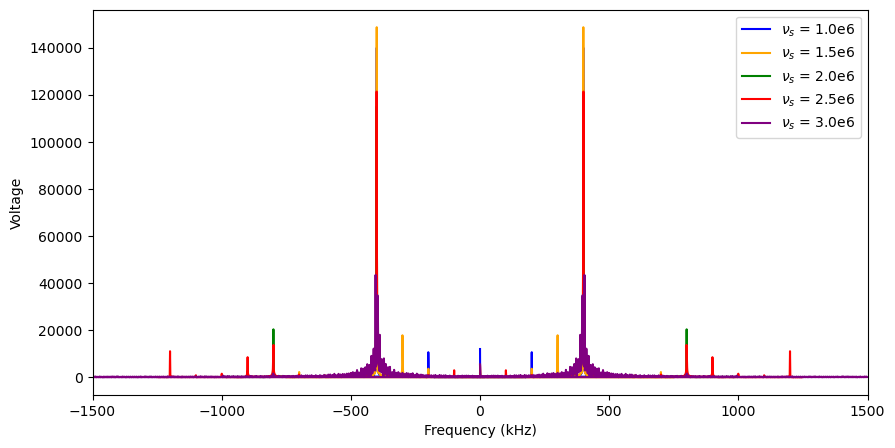

In [149]:
# Plotting the Voltage Spectrum — instant phase information via real and imaginary components

Xf_A = np.fft.fft(arr_A[1]) # Frequency bins
freqA = np.fft.fftfreq(len(arr_A[1]), d=dtA) # Generates frequency values in each bin in Xf

Xf_B = np.fft.fft(arr_B[1])
freqB = np.fft.fftfreq(len(arr_B[1]), d=dtB)

Xf_C = np.fft.fft(arr_C[1])
freqC = np.fft.fftfreq(len(arr_C[1]), d=dtC)

Xf_D = np.fft.fft(arr_D[1])
freqD = np.fft.fftfreq(len(arr_D[1]), d=dtD)

Xf_E = np.fft.fft(arr_E[1])
freqE = np.fft.fftfreq(len(arr_E[1]), d=dtE)

# Computing voltage, the magnitude of each frequency bin
V_A = np.abs(Xf_A)
V_B = np.abs(Xf_B)
V_C = np.abs(Xf_C)
V_D = np.abs(Xf_D)
V_E = np.abs(Xf_E)

plt.figure(figsize=(10,5))

plt.plot(freqA / 1e3, # Converting mega Hz to kilo Hz
         V_A, color='blue', label = r"$\nu_{s}$ = 1.0e6")
plt.plot(freqB / 1e3, V_B, color='orange', label = r"$\nu_{s}$ = 1.5e6")
plt.plot(freqC / 1e3, V_C, color='green', label = r"$\nu_{s}$ = 2.0e6")
plt.plot(freqD / 1e3, V_D, color='red', label = r"$\nu_{s}$ = 2.5e6")
plt.plot(freqE / 1e3, V_E, color='purple', label = r"$\nu_{s}$ = 3.0e6")

plt.xlabel('Frequency (kHz)')
plt.ylabel('Voltage')

plt.xlim(-1500,1500)
plt.legend()
plt.show()

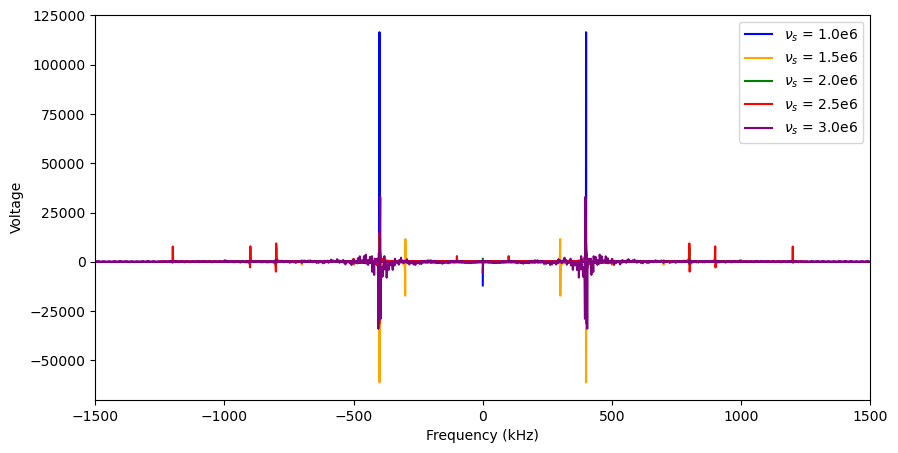

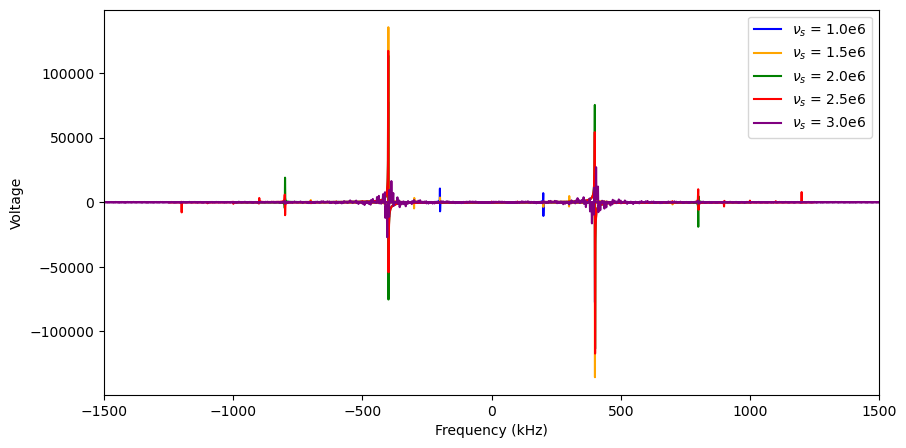

In [171]:
# When would you prefer voltage over power spectrum and vice versa?
# Considering the Complex Voltage Spectrum
    # What do real and imaginary parts represent?
    # How are negative frequencies realized?

# Plotting the Complex Voltage Spectrum (no abs value)
    # Real elements

V_A = np.abs(Xf_A)
V_B = np.abs(Xf_B)
V_C = np.abs(Xf_C)
V_D = np.abs(Xf_D)
V_E = np.abs(Xf_E)

plt.figure(figsize=(10,5))

plt.plot(freqA / 1e3, # Converting mega Hz to kilo Hz
         np.real(Xf_A), color='blue', label = r"$\nu_{s}$ = 1.0e6")
plt.plot(freqB / 1e3, np.real(Xf_B), color='orange', label = r"$\nu_{s}$ = 1.5e6")
plt.plot(freqC / 1e3, np.real(Xf_C), color='green', label = r"$\nu_{s}$ = 2.0e6")
plt.plot(freqD / 1e3, np.real(Xf_D), color='red', label = r"$\nu_{s}$ = 2.5e6")
plt.plot(freqE / 1e3, np.real(Xf_E), color='purple', label = r"$\nu_{s}$ = 3.0e6")

plt.xlabel('Frequency (kHz)')
plt.ylabel('Voltage')

plt.xlim(-1500,1500)
plt.legend()
plt.show()



# Plotting the Complex Voltage Spectrum (no abs value)
    # Imaginary elements

plt.figure(figsize=(10,5))

plt.plot(freqA / 1e3, # Converting mega Hz to kilo Hz
         np.imag(Xf_A), color='blue', label = r"$\nu_{s}$ = 1.0e6")
plt.plot(freqB / 1e3, np.imag(Xf_B), color='orange', label = r"$\nu_{s}$ = 1.5e6")
plt.plot(freqC / 1e3, np.imag(Xf_C), color='green', label = r"$\nu_{s}$ = 2.0e6")
plt.plot(freqD / 1e3, np.imag(Xf_D), color='red', label = r"$\nu_{s}$ = 2.5e6")
plt.plot(freqE / 1e3, np.imag(Xf_E), color='purple', label = r"$\nu_{s}$ = 3.0e6")

plt.xlabel('Frequency (kHz)')
plt.ylabel('Voltage')

plt.xlim(-1500,1500)
plt.legend()
plt.show()
# Imaginary frequencies are ordered, meaning that if you do the shift (code in my OLD_CODE file), then you get a mirrored plot (over the y-axis) for the imaginary


# Observe symmetries between negative and positive frequencies
# Explain amplitude and sign variations

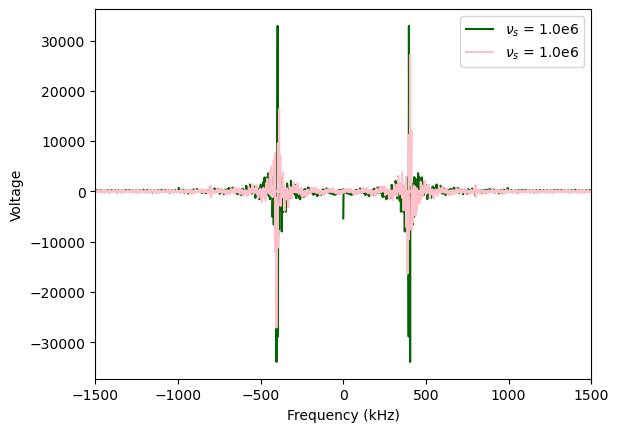

In [169]:
# Plotting the Real and Imaginary Parts
plt.plot(freqE / 1e3, # Converting mega Hz to kilo Hz
         np.real(Xf_E), color='darkgreen', label = r"$\nu_{s}$ = 1.0e6")
plt.plot(freqE / 1e3, # Converting mega Hz to kilo Hz
         np.imag(Xf_E), color='pink', label = r"$\nu_{s}$ = 1.0e6")

plt.xlabel('Frequency (kHz)')
plt.ylabel('Voltage')

plt.xlim(-1500,1500)
plt.legend()
plt.show()

In [ ]:
# FIR Coefficients
fir_coeffs = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2047])

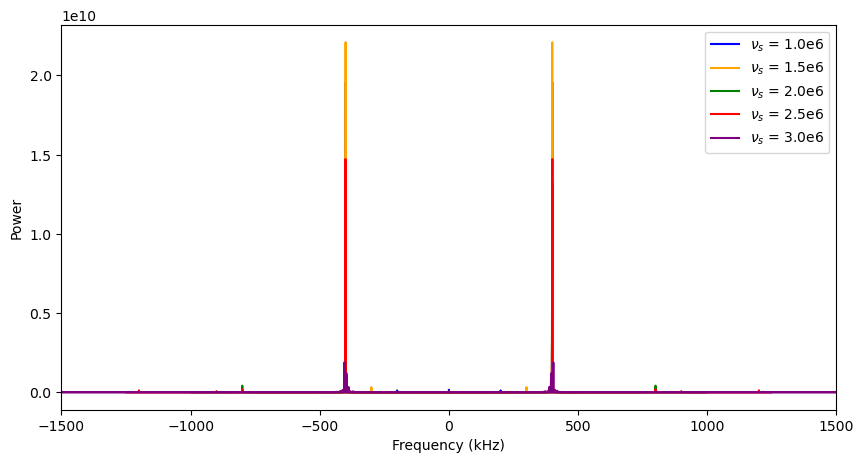

In [119]:
# Ploting the Power Spectrum — summarizes the frequency content
    # Shifted version in the OLD_CODE ipynb

# Converting each sample rate into the respective time step
dtA = 1 / v_1 # v_1 = 1.0e6
dtB = 1 / v_2 # v_2 = 1.5e6
dtC = 1 / v_3 # v_3 = 2.0e6
dtD = 1 / v_4 # v_4 = 2.5e6
dtE = 1 / v_5 # v_5 = 3.0e6

# Fast Fourier Transform (FFT)
Xf_A = np.fft.fft(arr_A[1]) # Frequency bins
freqA = np.fft.fftfreq(len(arr_A[1]), d=dtA) # Generates frequency values in each bin in Xf

Xf_B = np.fft.fft(arr_B[1])
freqB = np.fft.fftfreq(len(arr_B[1]), d=dtB)

Xf_C = np.fft.fft(arr_C[1])
freqC = np.fft.fftfreq(len(arr_C[1]), d=dtC)

Xf_D = np.fft.fft(arr_D[1])
freqD = np.fft.fftfreq(len(arr_D[1]), d=dtD)

Xf_E = np.fft.fft(arr_E[1])
freqE = np.fft.fftfreq(len(arr_E[1]), d=dtE)

# Computing power, the magnitude squared of each frequency bin
P_A = np.abs(Xf_A)**2
P_B = np.abs(Xf_B)**2
P_C = np.abs(Xf_C)**2
P_D = np.abs(Xf_D)**2
P_E = np.abs(Xf_E)**2

plt.figure(figsize=(10,5))

plt.plot(freqA / 1e3, # Converting mega Hz to kilo Hz
         P_A, color='blue', label = r"$\nu_{s}$ = 1.0e6")
plt.plot(freqB / 1e3, P_B, color='orange', label = r"$\nu_{s}$ = 1.5e6")
plt.plot(freqC / 1e3, P_C, color='green', label = r"$\nu_{s}$ = 2.0e6")
plt.plot(freqD / 1e3, P_D, color='red', label = r"$\nu_{s}$ = 2.5e6")
plt.plot(freqE / 1e3, P_E, color='purple', label = r"$\nu_{s}$ = 3.0e6")

plt.xlabel('Frequency (kHz)')
plt.ylabel('Power')

plt.xlim(-1500,1500)
plt.legend()
plt.show()

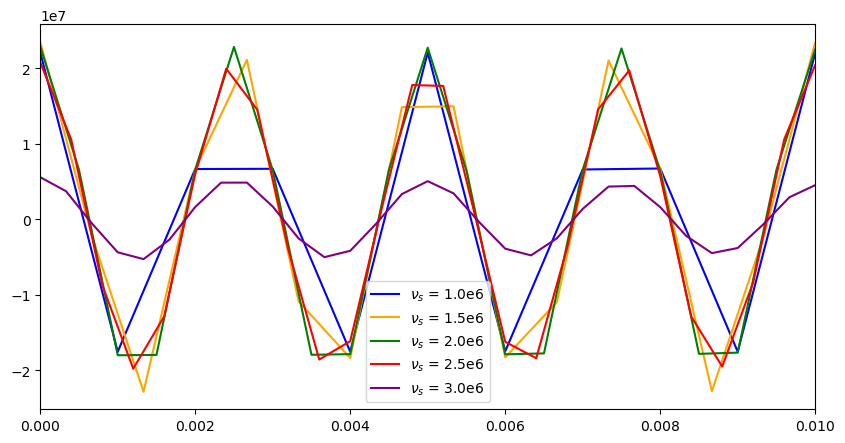

In [213]:
# Fourier Transform of a power series
# Inverse Fourier Transformation

InverseFT_A = np.fft.ifft(P_A)
InverseFT_B = np.fft.ifft(P_B)
InverseFT_C = np.fft.ifft(P_C)
InverseFT_D = np.fft.ifft(P_D)
InverseFT_E = np.fft.ifft(P_E)

plt.figure(figsize=(10,5))

plt.plot(t_A*1000, InverseFT_A, color='blue', label = r"$\nu_{s}$ = 1.0e6")
plt.plot(t_B*1000, InverseFT_B, color='orange', label = r"$\nu_{s}$ = 1.5e6")
plt.plot(t_C*1000, InverseFT_C, color='green', label = r"$\nu_{s}$ = 2.0e6")
plt.plot(t_D*1000, InverseFT_D, color='red', label = r"$\nu_{s}$ = 2.5e6")
plt.plot(t_E*1000, InverseFT_E, color='purple', label = r"$\nu_{s}$ = 3.0e6")

plt.xlabel('')
plt.ylabel('')

plt.xlim(0,0.01)
plt.legend()
plt.show()

In [215]:
# Computing the Autocorrelation Function
    # Using numpy.correlate and scipy.signal.correlate

from scipy.signal import correlate, correlation_lags

# Inputs
dtA = 1 / v_1 # v_1 = 1.0e6

# Demean
Mean_A = arr_A[1] - np.mean(arr_A[1])

# Autocorrelation
ACF = np.correlate(Mean_A, Mean_A, mode='full')

# Lags
lags = scipy.signal.correlation_lags((len(arr_A[1]), len(arr_A[1]), mode="full") * dtA)

# Normalize
ACF /= np.max(ACF)

# Plot
plt.figure()
plt.plot(lags, ACF)
plt.xlabel("Lag (s)")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function (scipy.signal)")
plt.grid()
plt.show()

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1585799273.py, line 16)

In [ ]:

corr = signal.correlate(, _)
lags = signal.correlation_lags(len(sig), len(sig_noise))
corr /= np.max(corr)

In [57]:


# Fourier transform of the power spectrum = ACF
avg_A = np.mean(arr_A[1])
dev_A = arr_A[1] - avg_A

ACF = np.correlate(dev_A, dev_A, mode="full")


# OLD CODE

AutoCorr = AutoCorr_Full[AutoCorr_Full.size//2:]
AutoCorr /= AutoCorr[0]
tau = np.arange(len(AutoCorr)) / v_1


# Complex_A = np.fft.fft(arr_A[1])
Pow_A = np.abs(arr_A[1])**2
AutoCorr_A = np.fft.ifft(Pow_A).real
AutoCorr_A /= AutoCorr_A[0]

IndexError: invalid index to scalar variable.

In [73]:
print(arr_A)

41
